## **1. Supervised Learning**

In Supervised Learning the predicted values are known. The aim is to predict the target values of unseen data, given the features.

**Types of supervised Learning:**

- Classification: Target variable consists of categories
- Regression: Target variable is continous.

**Feature** = predictor variable = independent variable 

**Target variable** = dependent variable = response variable


**Requirements** before using Supervised Learning
- No missing values
- Data in numeric format
- Data stored in pandas DataFrames or NumPy Arrays.

Perform Exploratory Data Analysis (EDA) first.


**Scikit-Learn Syntax:**
- from sklearn.module import Model
- model = Model()
- model.fit(X,y)
- predictions = model.predict(X_new)
- print(predictions)


### **1.1. Classification**

#### **k-Nearest Neighbors**

**Predict the label of a data point by**
- **Looking at the k closest labeled data points**
- **Taking a majority vote**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

churn_df = pd.read_csv('../datasets/telecom_churn_clean.csv', index_col=0)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [90]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 


# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


#### **Measuring model performance**

In classification, accuracy is a commonly used metric.

\begin{align*}
Accuracy = \frac{\text{correct predictions}}{\text{total observations}}
\end{align*}

But it is NOT indicative of how well it can generalize to unseen data, which is what we are interested in!

Therefore we **split the data into training set and test set**

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


#### **Model complexity and Over/Underfitting**

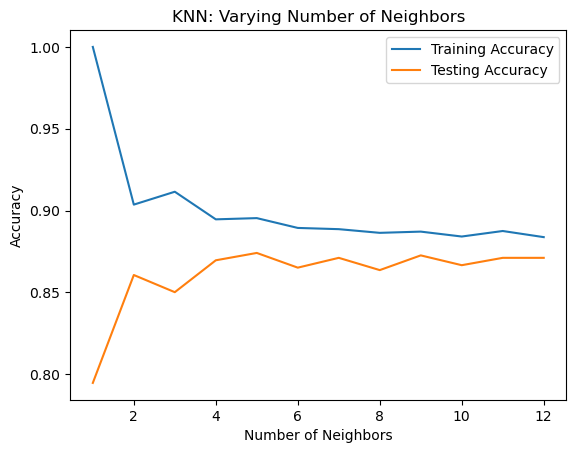

In [93]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

### **1.2. Regression**

In [94]:
diabetes_df = pd.read_csv('../datasets/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Basics of Linear Regression**


\begin{align*}
y = \beta_0 + \beta_1 x
\end{align*}

Simple Linear Regression uses one feature
- $y$ = target
- $x$ = single feature
- $\beta_0$ and $\beta_1$ are the coefficients (slope and intercept)


**How we choose $\beta_0$ and $\beta_1$?**

**Choose the line that minimize the error function/loss function**

- We want the line to be as close to observations as possible - **best fit**.
- Therefore we want to minimize the vertical distances between the fit and the data.
- So for each observation, we caluclate the vertical distance betweet it and the line. This distance is called **residual**.
- By adding all the squared residuals, we calculate the the residual sum of squares:


\begin{align*}
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}

This type of linar regression is called **Ordinary Least Squares**, where **we minimize the RSS**.


When we have two or more features:

\begin{align*}
y &= \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \beta_k X_{ik}  \\
  &= \beta_0 + \sum_{j=1}^{k} \beta_{j} X_{ij}
\end{align*}

The **default metric** for linear Regression is **$R^2$** (Coefficient of determination), which quantifies the amount of variance in the target variable that is explained by the features. The values for $R^2$ can range from $0$ to $1$, where $1$ meaning the features completely explain the target's variance.



Another way to asses a regression model's performance is to take the **mean of the residual sum of squares (MSE)**.

\begin{align*}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}

MSE is measured in units of our target variable, squared. So we need to take the squared root **Root Mean Squared Error**, so we have the same units as the target variable:

\begin{align*}
RMSE = \sqrt{MSE}
\end{align*}

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### **Simple Linear Regression**

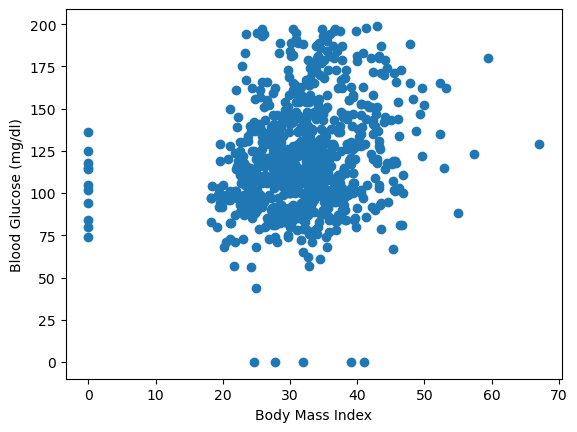

In [96]:
X_bmi = diabetes_df['bmi'].values
y = diabetes_df['glucose']

plt.scatter(X_bmi,y)
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Glucose (mg/dl)')
plt.show()

In [97]:
X_bmi = X_bmi.reshape(-1,1)

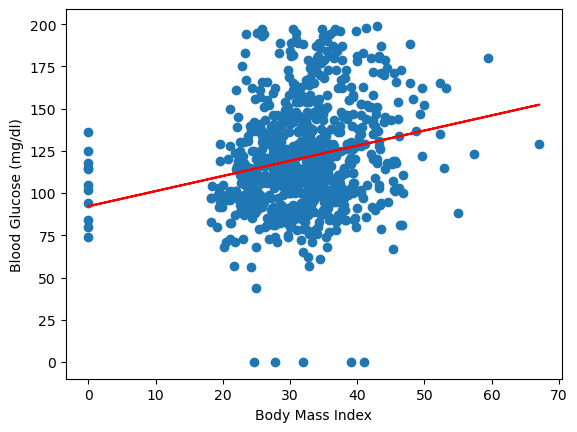

In [98]:
reg = LinearRegression()
reg.fit(X_bmi,y)

predictions = reg.predict(X_bmi)

plt.scatter(X_bmi,y)
plt.plot(X_bmi, predictions, color = 'red')
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Glucose (mg/dl)')
plt.show()

#### **Multiple Linear Regression**

In [99]:
X = diabetes_df.drop('glucose',axis=1).values
y = diabetes_df['glucose'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

In [100]:
print(reg_all.score(X_test,y_test))

0.2828046881037515


Here the features only explain about 28% of blood glucose level variance.

In [101]:
RMSE = mean_squared_error(y_test,y_pred, squared=False)
print(RMSE)

26.34145958223226


The model has an average error for blood glucose levels of around 24 milligrams per deciliter.

### **1.3. Fine-Tuning your Model**

### **1.4. Preprocessing and Pipelines**